# 1. Importing the Libraries

In [1]:
import pandas as pd

# 2. Importing the Dataset

In [2]:
data = pd.read_csv('heart.csv')

# 3. Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. Taking Care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

# 5. Data Processing

In [9]:
cate_val = []
const_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        const_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
const_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6. Encoding Categorical Data

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 7. Feature Scaling

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
data[const_val] = st.fit_transform(data[const_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# 8. Splitting The Dataset Into The Training Set And Test Set

In [20]:
X = data.drop('target',axis=1)

In [21]:
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 9. Logistic Regression

In [25]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1 = log.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# 10. SCV (Support Vector Classifier)

In [31]:
from sklearn import svm

In [32]:
svm = svm.SVC()

In [33]:
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred2 = svm.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# 11. KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred3=knn.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [41]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [42]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [43]:
import matplotlib.pyplot as plt

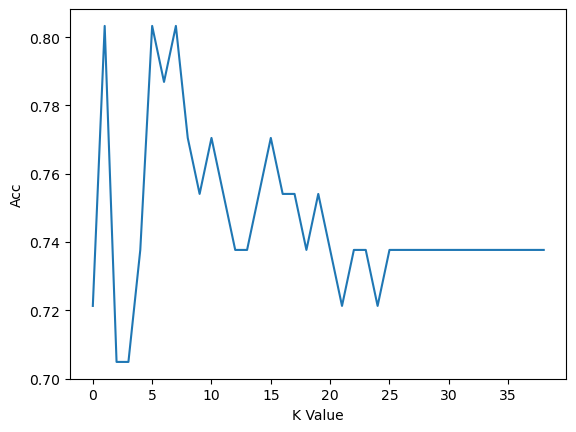

In [44]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [45]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

# Non Linear Machine Learning Algorithm

In [46]:
data = pd.read_csv('heart.csv')

In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
data = data.drop_duplicates()

In [49]:
data.shape

(302, 14)

In [50]:
X = data.drop('target',axis=1)
y=data['target']

In [51]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# 12. Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred4 = dt.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

# 13. Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred5 = rf.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

# 14. Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier()

In [64]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred6 = gbc.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [67]:

final_data = pd.DataFrame({'Models':['LR','SVM','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [68]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,DT,72.131148
3,RF,85.245902
4,GB,80.327869


In [69]:
import seaborn as sns

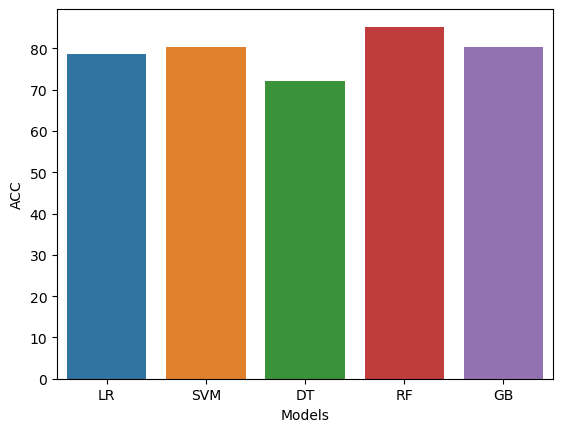

In [70]:
import matplotlib.pyplot as plt  # Importing matplotlib for displaying the plot

# Assuming final_data is a DataFrame containing 'Models' and 'ACC' columns
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()  # Display the plot

In [71]:
X=data.drop('target',axis=1)
y=data['target']

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# 15. Histogram For Each Target Values

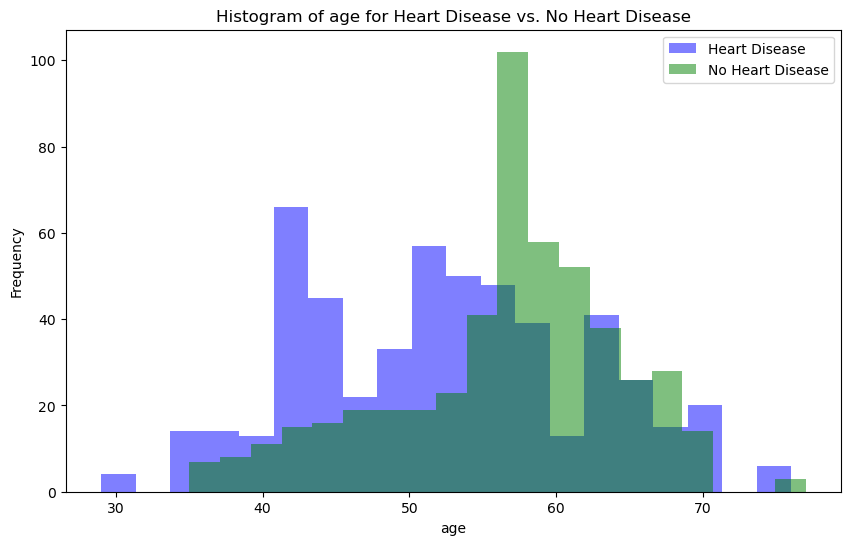

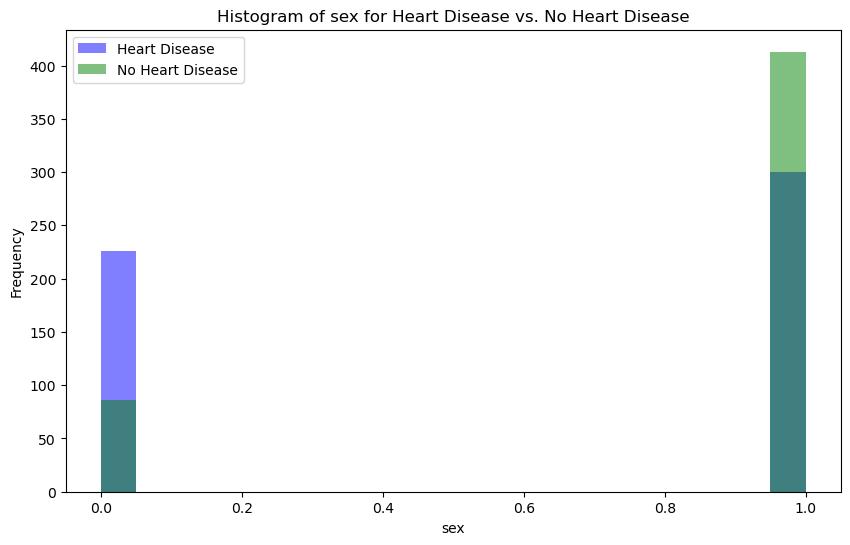

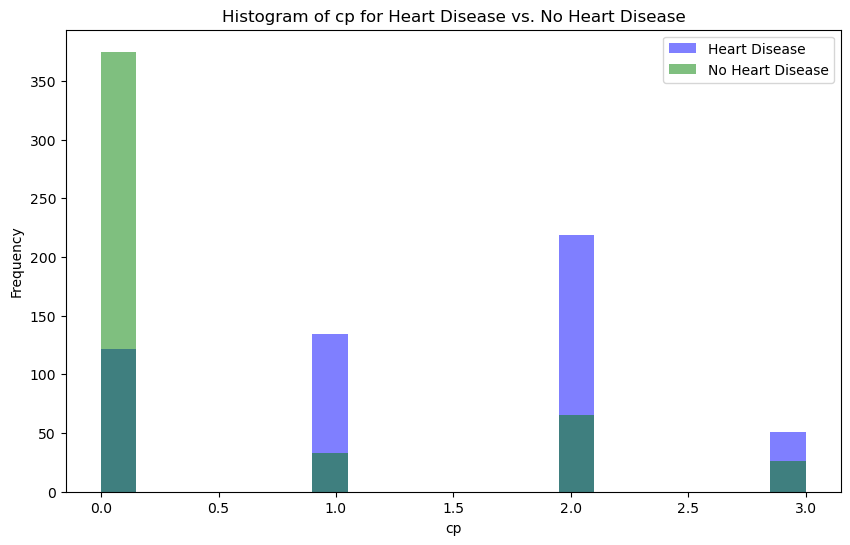

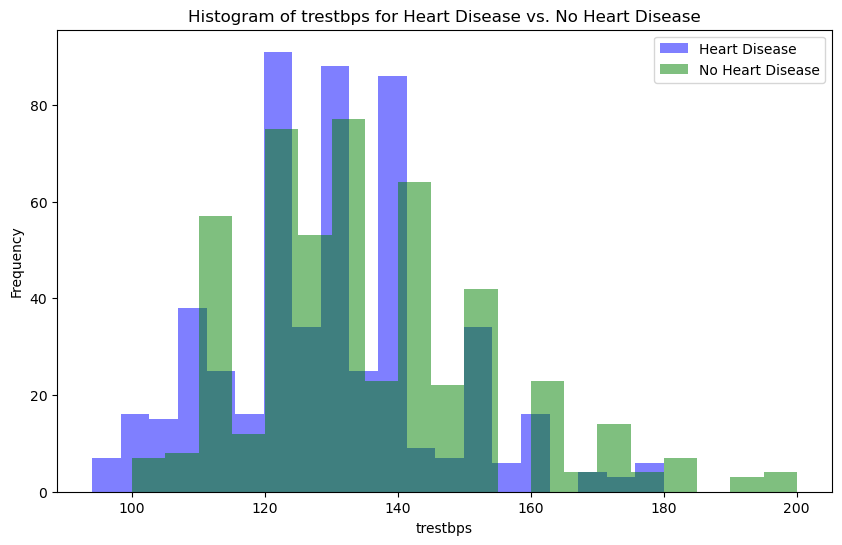

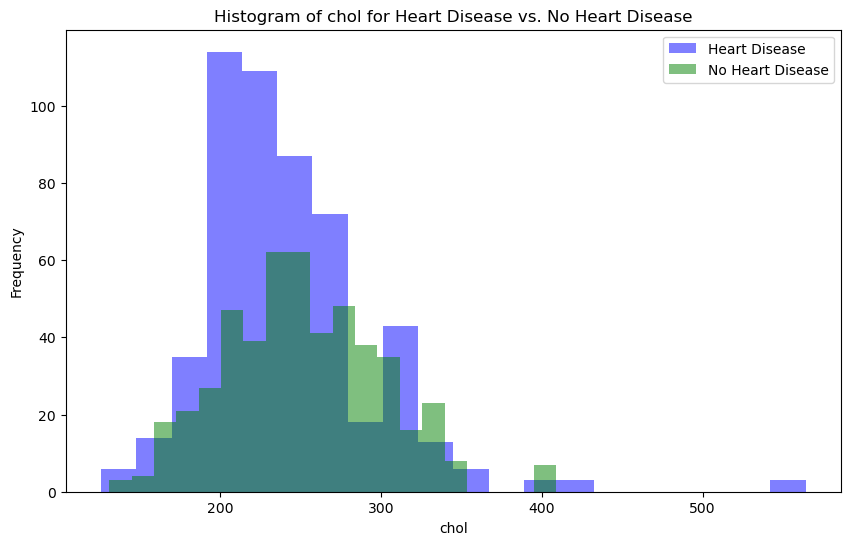

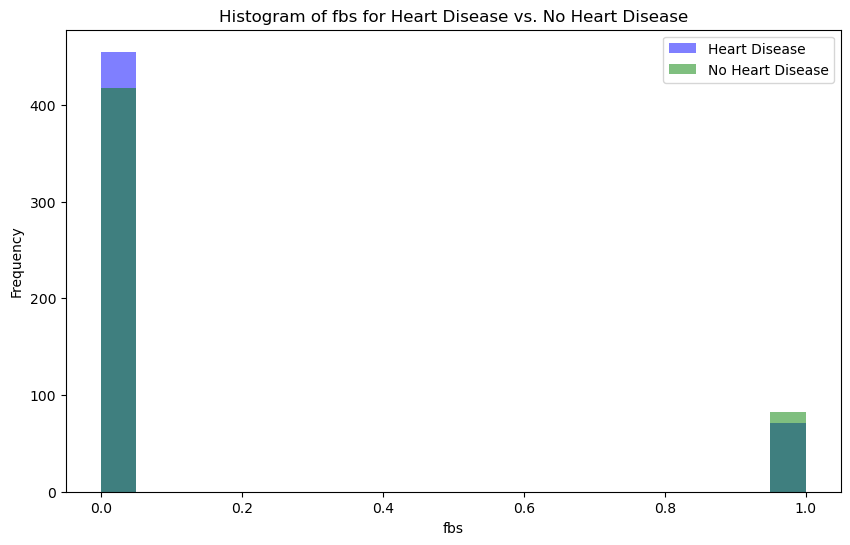

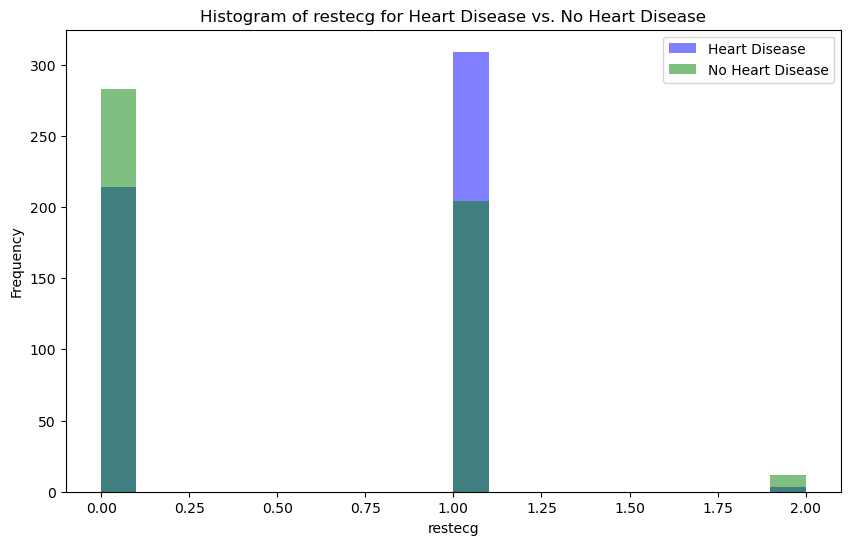

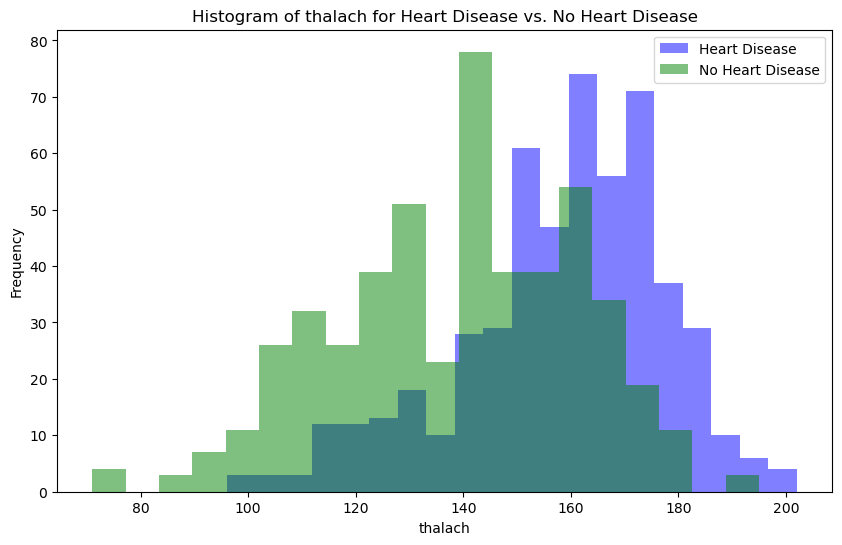

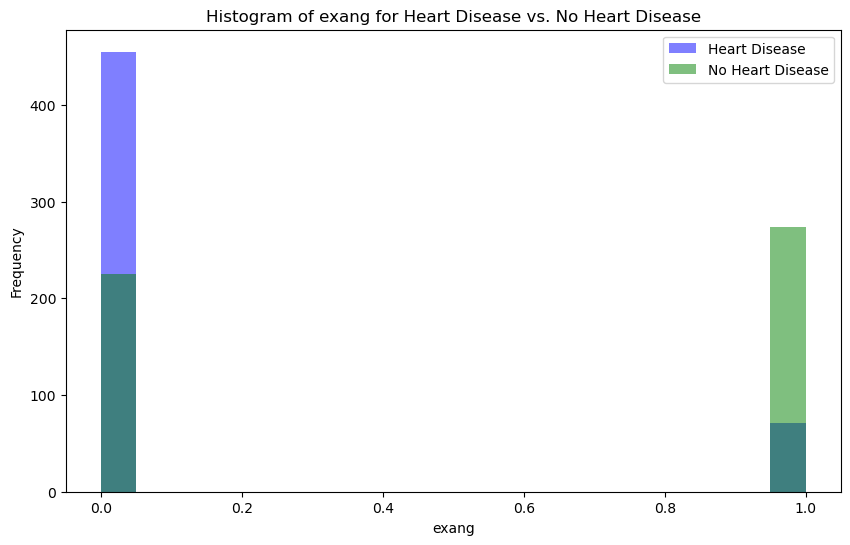

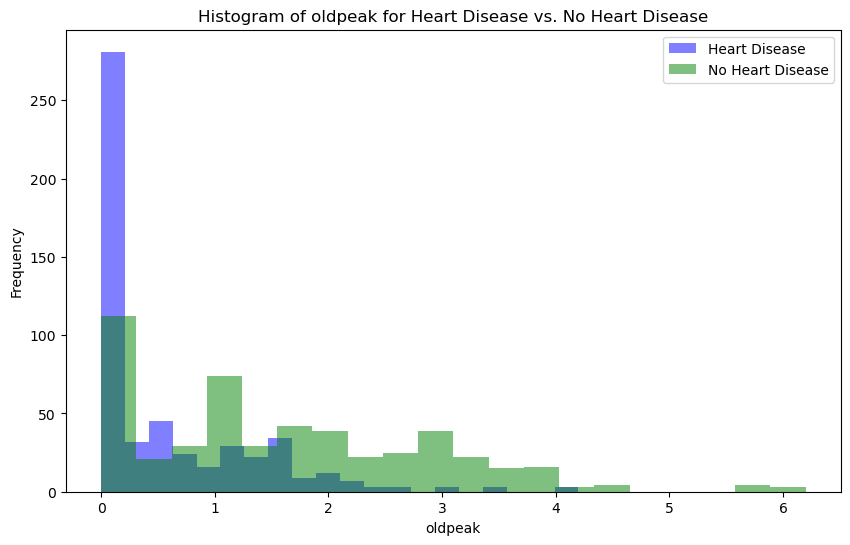

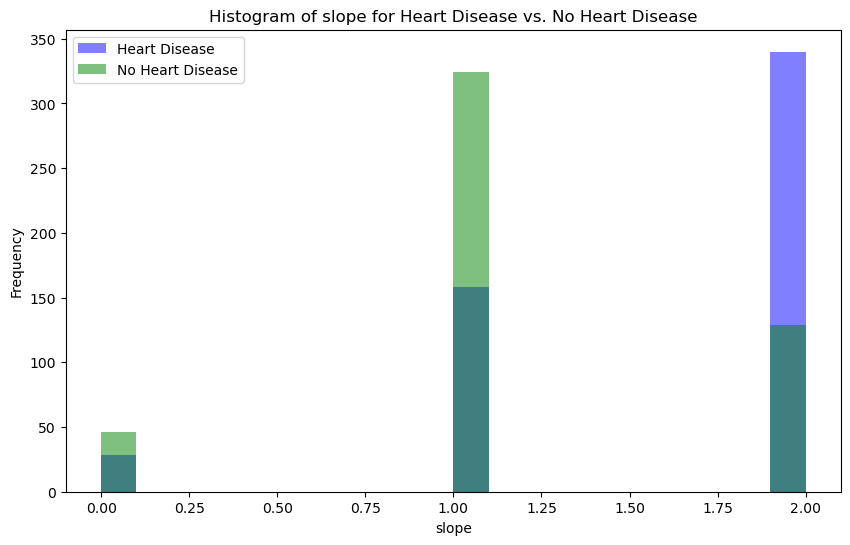

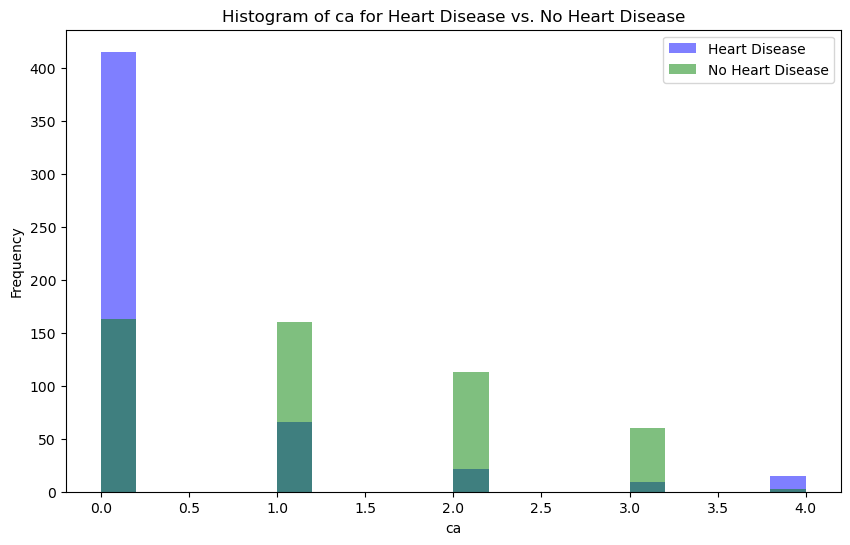

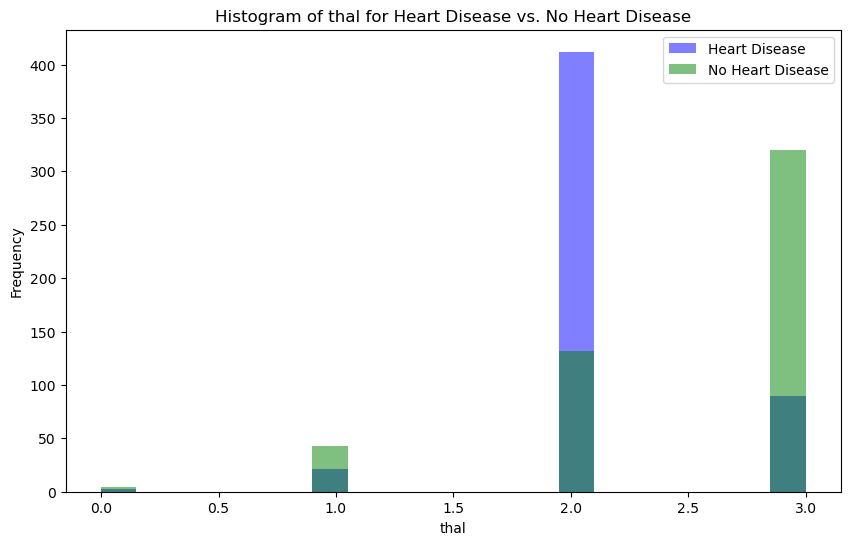

In [75]:
# Separate data based on target variable
heart_disease = heart_data[heart_data['target'] == 1]
no_heart_disease = heart_data[heart_data['target'] == 0]

# Define a function to plot histograms for each attribute
def plot_histogram(attribute_name):
    plt.figure(figsize=(10, 6))
    plt.hist(heart_disease[attribute_name], bins=20, alpha=0.5, color='blue', label='Heart Disease')
    plt.hist(no_heart_disease[attribute_name], bins=20, alpha=0.5, color='green', label='No Heart Disease')
    plt.xlabel(attribute_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Histogram of {attribute_name} for Heart Disease vs. No Heart Disease')
    plt.show()

# Plot histograms for each attribute
attributes_to_analyze = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for attribute in attributes_to_analyze:
    plot_histogram(attribute)

# 16. Confusion Matrix

In [76]:
# Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix  
y_test_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[32  0]
 [ 0 29]]


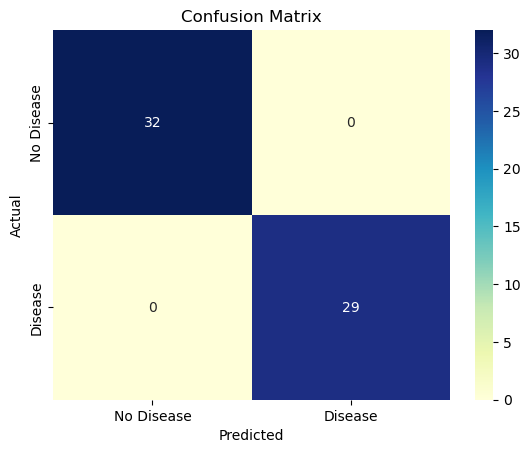

In [77]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 17. Training And Execution Time of Each Models

In [78]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# Other necessary imports for your project

# Data preparation
# Assuming X and y are your dataset

# Train and evaluate model 1
# Measure training time
start_train_model1 = time.time()
# Train model 1
# Evaluation code
end_train_model1 = time.time()
train_time_model1 = end_train_model1 - start_train_model1

# Measure execution time
start_exec_model1 = time.time()
# Predictions using model 1
end_exec_model1 = time.time()
exec_time_model1 = end_exec_model1 - start_exec_model1

# Print results for model 1
print("Model 1 Training Time:", train_time_model1)
print("Model 1 Execution Time:", exec_time_model1)
# Confusion matrix for model 1

# Train and evaluate model 2
# Measure training time
start_train_model2 = time.time()
# Train model 2
# Evaluation code
end_train_model2 = time.time()
train_time_model2 = end_train_model2 - start_train_model2

# Measure execution time
start_exec_model2 = time.time()
# Predictions using model 2
end_exec_model2 = time.time()
exec_time_model2 = end_exec_model2 - start_exec_model2

# Print results for model 2
print("Model 2 Training Time:", train_time_model2)
print("Model 2 Execution Time:", exec_time_model2)

Model 1 Training Time: 0.0
Model 1 Execution Time: 0.0
Model 2 Training Time: 0.0010042190551757812
Model 2 Execution Time: 0.0


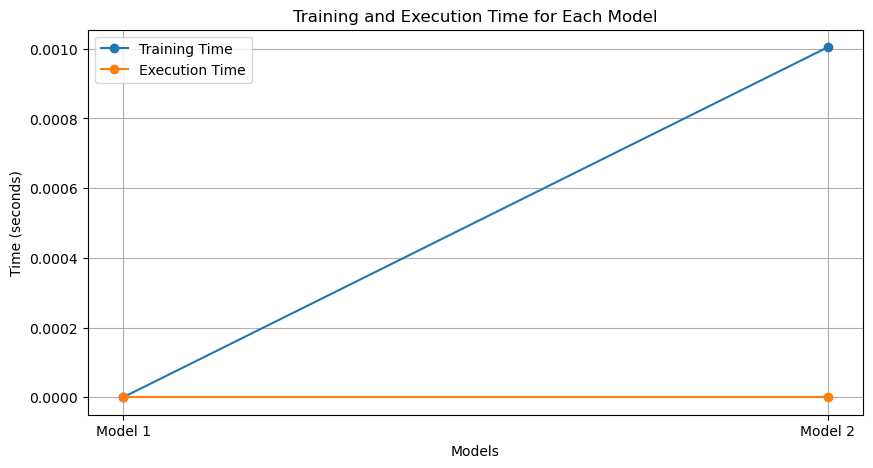

In [79]:
import matplotlib.pyplot as plt

# Lists to store training and execution times for each model
model_names = ["Model 1", "Model 2"]
train_times = [train_time_model1, train_time_model2]
exec_times = [exec_time_model1, exec_time_model2]

# Plotting
plt.figure(figsize=(10, 5))

# Plot training times
plt.plot(model_names, train_times, marker='o', label='Training Time')

# Plot execution times
plt.plot(model_names, exec_times, marker='o', label='Execution Time')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.title('Training and Execution Time for Each Model')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# 18 .Prediction on New Data

In [80]:
import pandas as pd

In [81]:
new_data = pd.DataFrame ({
    'age' :52,
    'sex' :1,
    'cp' :0,
    'trestbps' :125,
    'chol' :212,
    'fbs' :0,
    'restecg' :1,
    'thalach' :168,
    'exang' :0,
    'oldpeak' :1.0,
    'slope' :2,
    'ca' :2,
    'thal' :3, 
},index=[0])

In [82]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [83]:
p = rf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease") 

No Disease


# 19. Save Model Using Joblib

In [84]:
import joblib

In [85]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [86]:
model = joblib.load ('model_joblib_heart')

In [87]:
model.predict(new_data)

array([0], dtype=int64)

In [88]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# 20. Graphical User Interface (GUI)

In [ ]:
from tkinter import *
from tkinter import messagebox, ttk
import joblib
import numpy as np
from sklearn import *

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())
        
        model = joblib.load('model_joblib_heart')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
        
        result_text = "No Heart Disease" if result == 0 else "Possibility of Heart Disease"
        messagebox.showinfo("Prediction Result", result_text)
    except Exception as e:
        messagebox.showerror("Input Error", f"Invalid input or model error: {str(e)}")

master = Tk()
master.title("Heart Disease Prediction System")
master.geometry("700x900")

style = ttk.Style(master)
style.configure("TLabel", font=("Helvetica", 14))
style.configure("TButton", font=("Helvetica", 16))

# Title label
title_label = Label(master, text="Heart Disease Prediction System", bg="black", fg="white", font=("Helvetica", 18), pady=10)
title_label.pack(fill=X)

main_frame = Frame(master, padx=20, pady=20)
main_frame.pack(padx=10, pady=10)

# Input labels and entries
labels = [
    "Enter Your Age", "Male Or Female [1/0]", "Enter Value of CP", 
    "Enter Value of Trestbps", "Enter Value of Chol", "Enter Value of Fbs", 
    "Enter Value of Restecg", "Enter Value of Thalach", "Enter Value of Exang", 
    "Enter Value of Oldpeak", "Enter Value of Slope", "Enter Value of CA", 
    "Enter Value of Thal"
]

entries = []
for i, label in enumerate(labels):
    row = Frame(main_frame)
    row.pack(fill=X, pady=5)
    lbl = ttk.Label(row, text=label, width=25, anchor=E)
    lbl.pack(side=LEFT)
    entry = ttk.Entry(row, width=30, font=("Helvetica", 14))
    entry.pack(side=LEFT, padx=10)
    entries.append(entry)

e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13 = entries

# Predict button
predict_button = ttk.Button(main_frame, text='Predict', command=show_entry_fields)
predict_button.pack(pady=20)

# Result label
result_label = Label(main_frame, text="", font=("Helvetica", 16))
result_label.pack(pady=10)

mainloop()